In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200529_Lick_3-m

## Si II 6355

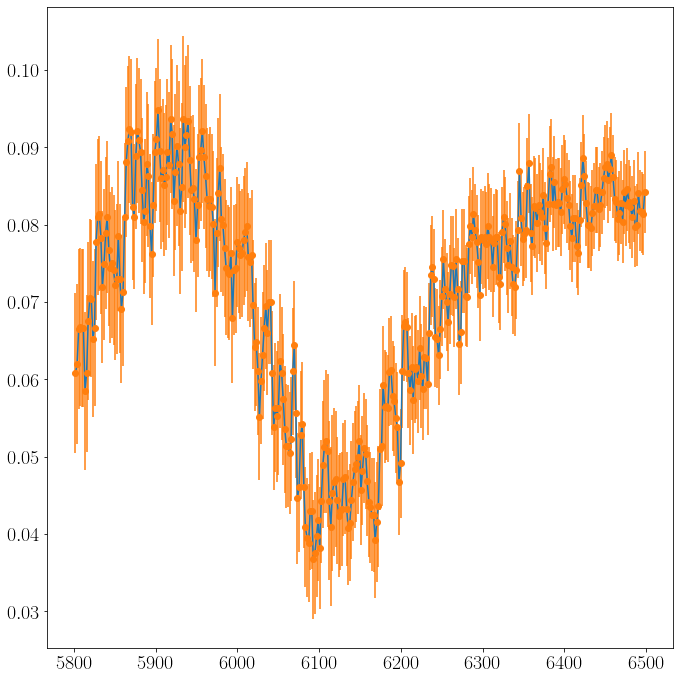

In [4]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

258 points within 5900.00 and 6400.00 angstroms.


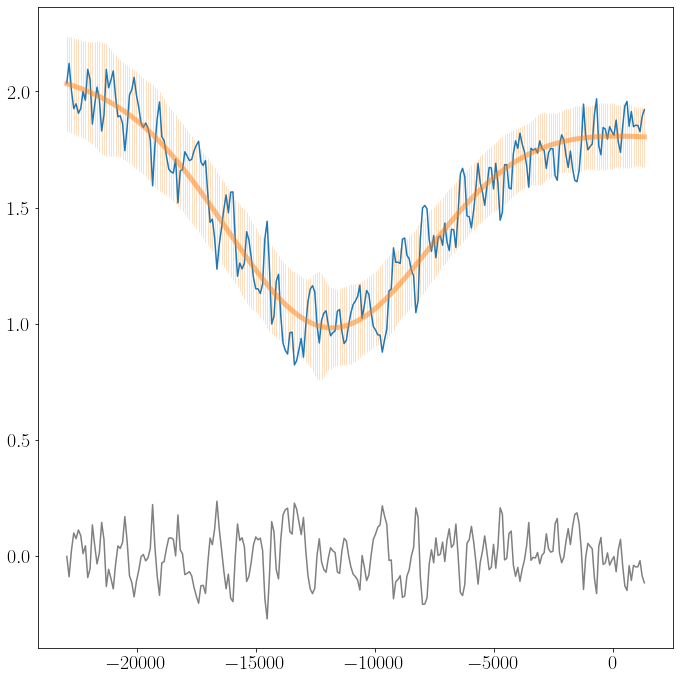

[ 1.81100016e+00  2.06804963e+00 -1.14256754e+04  1.66855430e+01
 -5.14806280e+03]


In [6]:
Spec1.line['SiII_6355'].LS_estimator()

100%|██████████| 1500/1500 [00:18<00:00, 78.99it/s] 


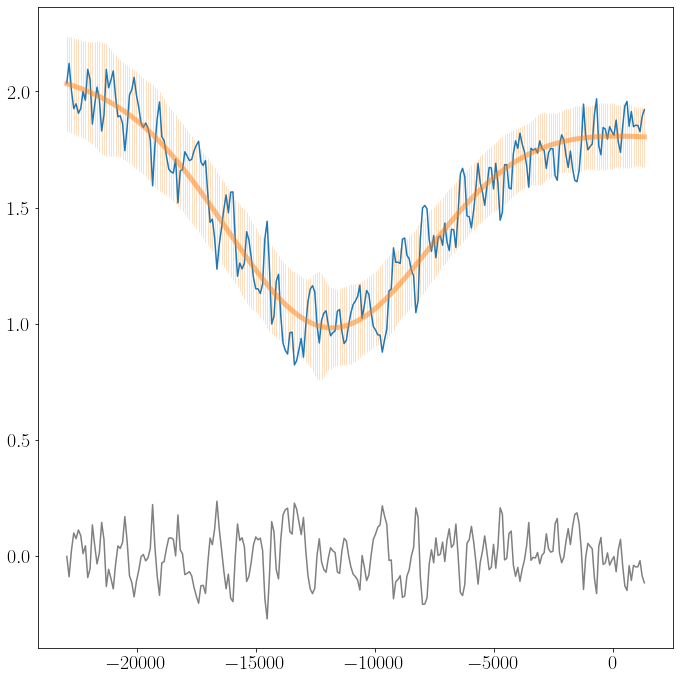

Velocity pvf: -11288 pm 147 km/s


In [7]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

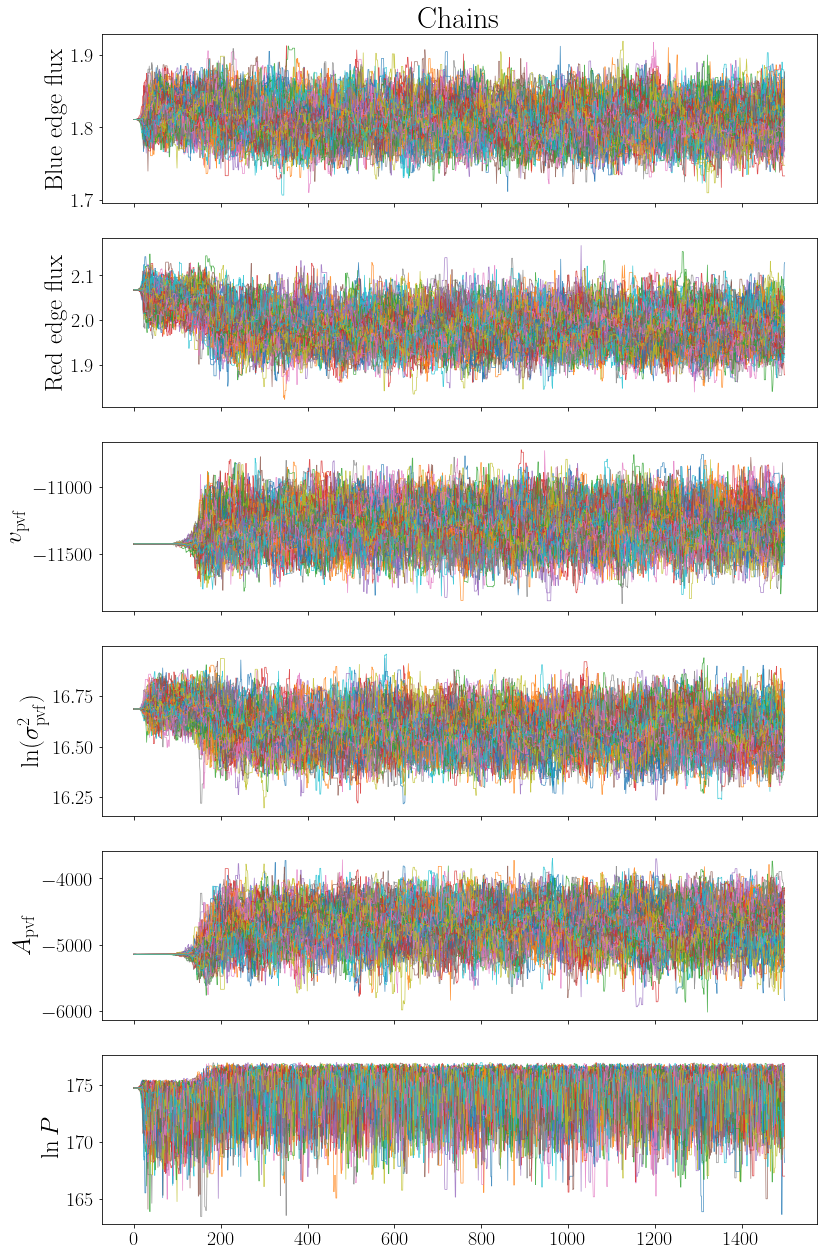

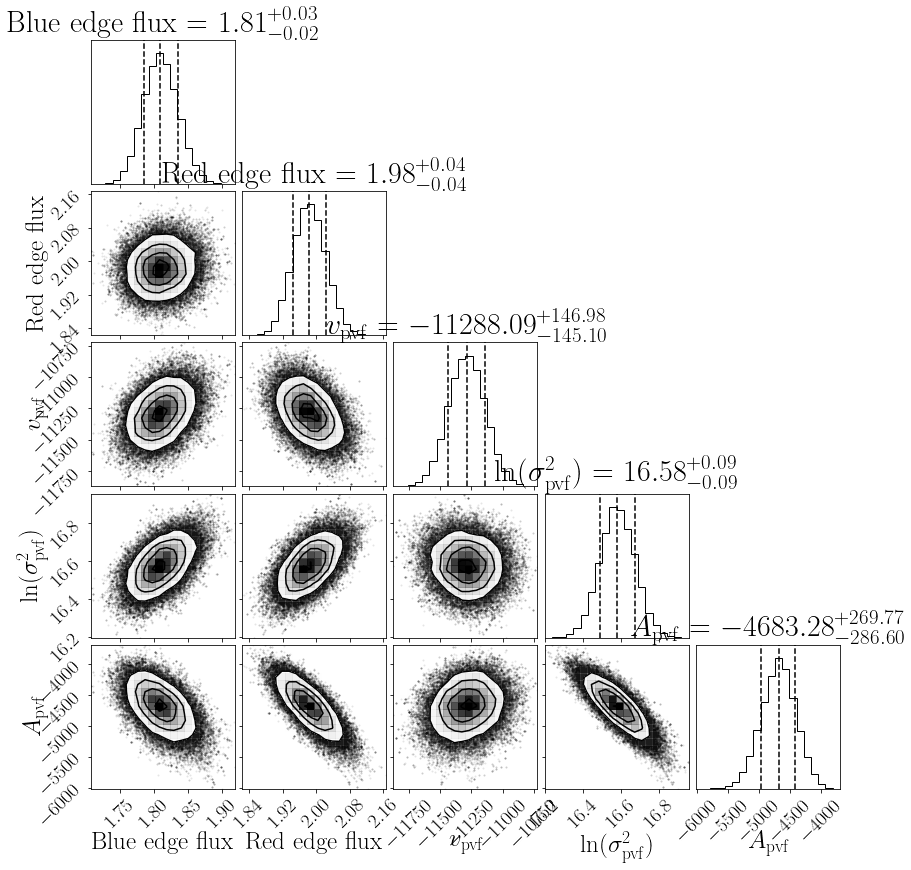

In [8]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

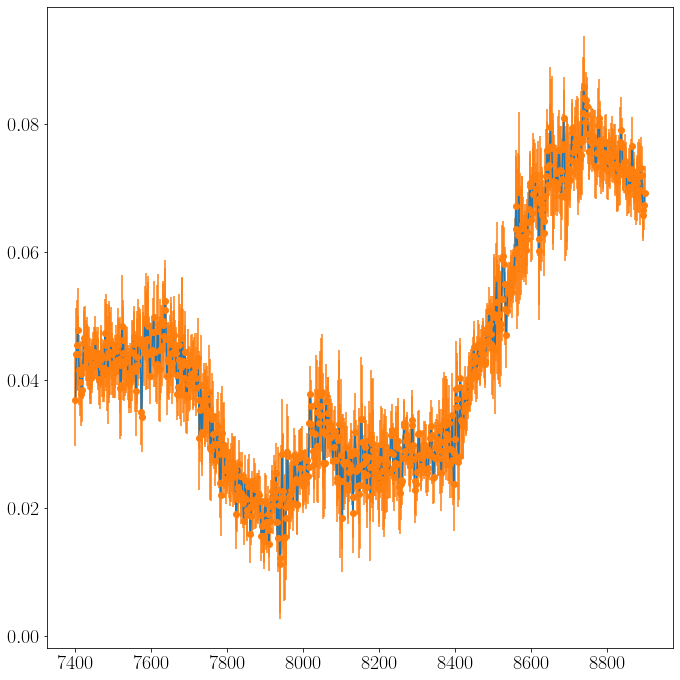

In [9]:
Spec1.plot_line_region(7400, 8900)

In [10]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

567 points within 7600.00 and 8700.00 angstroms.


In [11]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

[ 1.95065080e+00  1.04945813e+00 -9.24858060e+03  1.78534670e+01
 -6.80714488e+03 -2.48334930e+04  1.64059339e+01 -2.61669502e+03]


In [12]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=500)

100%|██████████| 1500/1500 [00:37<00:00, 39.86it/s]


Velocity pvf: -10780 pm 129 km/s
Velocity hvf: -25418 pm 212 km/s


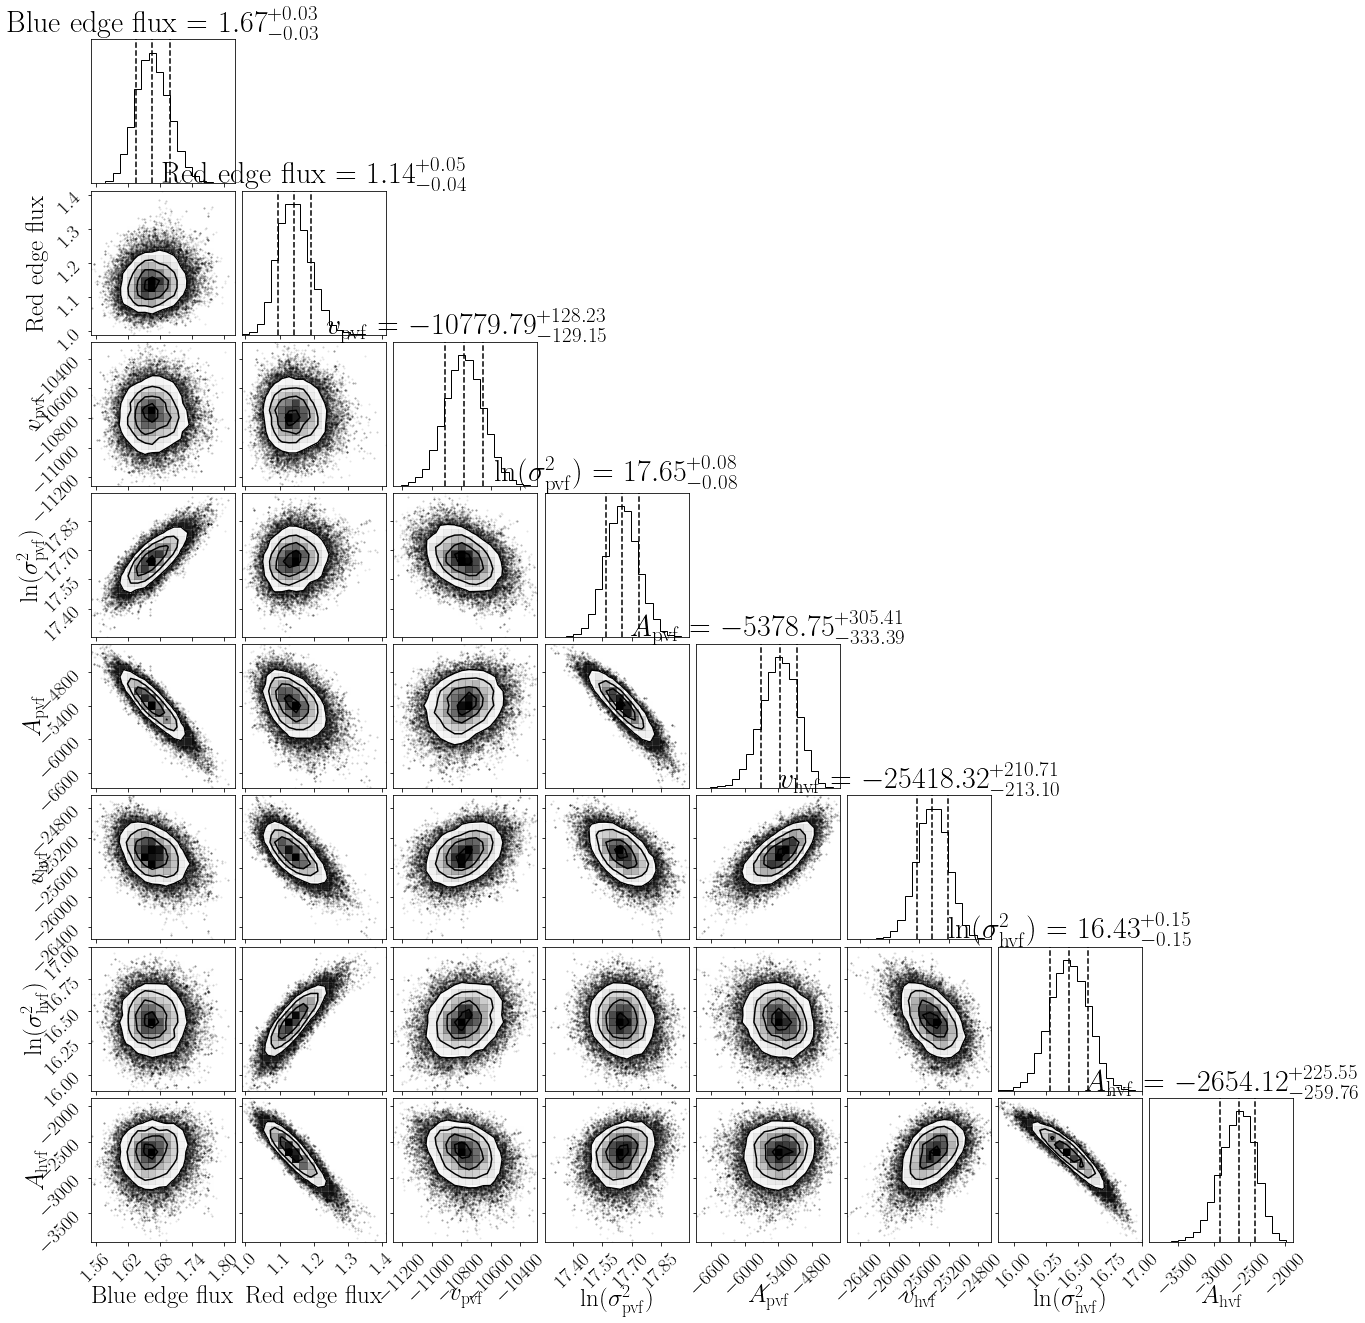

In [13]:
vel.plot_MCMC(sampler, 500)